<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia-eda-analysis-2/blob/main/EDA_09_Machine_Learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Load Cleaned Data**


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_12.xlsx')

In [ ]:
df.head()

,DM_Type2,OP,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,True,True,3,50.2,12.5,1.21,32.0,1.81,1.00,27.8,...,False,False,False,False,False,False,False,False,False,True
1,False,False,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,...,False,False,False,False,False,False,False,False,False,False
2,False,False,0,37.3,8.7,1.18,33.0,1.20,0.96,31.2,...,False,True,False,False,False,False,False,False,False,True
3,False,True,4,29.5,8.3,1.23,25.0,1.11,1.03,26.6,...,False,False,False,False,True,False,False,False,True,False
4,False,False,3,39.5,11.0,1.31,31.0,1.26,0.97,31.3,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
sorted(df.columns)

['AT',
 'Age_Group_AGE 60-80',
 'Age_Group_AGE 80-100',
 'BMI',
 'CST',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_Dyslipidemia',
 'Chronic_Diseases_Hipotiroidi',
 'Chronic_Diseases_KAH',
 'DM_Type2',
 'Education_Primary School',
 'Education_Secondary School',
 'Education_University',
 'Education_illiterate',
 'Exercise_Status_1-2/week',
 'Exercise_Status_3-4/week',
 'Gait_Speed',
 'Gender_M',
 'Grip_Str',
 'Job_farmer',
 'Job_health care personel',
 'Job_housewife',
 'Job_no_job',
 'Job_numbers_below_ten',
 'Job_public officer',
 'Job_retired',
 'Job_security_personel',
 'Job_self-employment',
 'Job_teacher',
 'Job_white_collar_below_55',
 'Job_worker',
 'OP',
 'STAR',
 'Sarcopenia',
 'Total_Number_of_Chronic_Diseases',
 'Waist_Hip_Ratio',
 'Work_Status_unknown',
 'Work_Status_working']

In [ ]:
df.isnull().sum()

,0
DM_Type2,0
OP,0
Total_Number_of_Chronic_Diseases,0
AT,0
CST,0
Gait_Speed,0
Grip_Str,0
STAR,0
Waist_Hip_Ratio,0
BMI,0


In [ ]:
df.columns

Index(['DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Gender_M', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
#Data Leakage Analysis -- Sonuçlar çok yüksek çıktığından ve over-fitting olmadığı anlaşıldığından data leakage olabileceği dikkate
#alınarak sarcopenia ile ilişkisi en yüksek olan feature lar veriden çıkartılarak yeniden run edildiğinde sonuçlar daha düşük çıktı. Burada
#birbiriyle korelasyonu yüksek veriler de dikkate alındı.

#df.drop(['AT'], axis=1, inplace=True)
df.drop(['STAR'], axis=1, inplace=True)
df.drop(['Grip_Str'], axis=1, inplace=True) # Doğrudan tanı kriteri olan değişken
#df.drop(['CST'], axis=1, inplace=True)
#df.drop(['Job_no_job'], axis=1, inplace=True)

**Step 3: Training Models on Subsets of Data**

3.1: Create Data Subsets (1,000 Patients)
*   **Action:** Original dataset was randomly sampled to create subsets of 1,000 patients.
*   **Consideration:** The subsets were also stratified to maintain class distribution, especially since the dataset is imbalanced.



In [ ]:
if len(df) < 1000:
  print("Warning: Dataset has less than 1,000 patients. Cannot create 1,000 patient subset.")
  df_1000 = None
else:
  # Stratified sampling for df_1000
  # Group by the target variable and sample from each group proportionally
  df_1000 = df.groupby('Sarcopenia').sample(n=int(1000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)
  # If the above leads to slightly less or more than n due to rounding, you might need to adjust
  # A safer way to ensure exactly n samples is to oversample/undersample from groups as needed or adjust n slightly
  # However, for demonstration and approximate subsets, this proportional sampling is common.

  # The following line ensures we have exactly 1000 rows if proportional sampling didn't achieve it exactly
  # This can introduce slight deviation from perfect stratification if counts are very small
  # A more robust approach might involve ensuring a minimum number of samples per group before sampling
  if len(df_1000) < 1000:
      remaining_samples = 1000 - len(df_1000)
      # Find rows not yet sampled and sample the remainder, ensuring no duplicates
      remaining_df = df[~df.index.isin(df_1000.index)]
      df_1000 = pd.concat([df_1000, remaining_df.sample(n=remaining_samples, random_state=42)])
  elif len(df_1000) > 1000:
       df_1000 = df_1000.sample(n=1000, random_state=42)


  X_1000 = df_1000.drop('Sarcopenia', axis=1)
  y_1000 = df_1000['Sarcopenia']
  # Now perform a stratified train-test split on the stratified subset
  X_train_1000, X_test_1000, y_train_1000, y_test_1000 = train_test_split(X_1000, y_1000, test_size=0.25, random_state=42, stratify=y_1000)


**Step 4: Train and Evaluate Decision Tree on 1,000 Patient Subset**

In [ ]:
if df_1000 is not None:
  dt_classifier_1000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_1000.fit(X_train_1000, y_train_1000)
  y_pred_dt_1000 = dt_classifier_1000.predict(X_test_1000)

  # Train sonuçlarını hesapla
  y_train_pred_dt = dt_classifier_1000.predict(X_train_1000)
  train_accuracy_dt = accuracy_score(y_train_1000, y_train_pred_dt)
  train_precision_dt = precision_score(y_train_1000, y_train_pred_dt)
  train_recall_dt = recall_score(y_train_1000, y_train_pred_dt)
  train_f1_dt = f1_score(y_train_1000, y_train_pred_dt)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")


  # Test sonuçlarını hesapla
  accuracy_dt_1000 = accuracy_score(y_test_1000, y_pred_dt_1000)
  precision_dt_1000 = precision_score(y_test_1000, y_pred_dt_1000)
  recall_dt_1000 = recall_score(y_test_1000, y_pred_dt_1000)
  f1_dt_1000 = f1_score(y_test_1000, y_pred_dt_1000)

  print(f"\nDecision Tree (1,000 Patients) - Accuracy: {accuracy_dt_1000:.4f}")
  print(f"Decision Tree (1,000 Patients) - Precision: {precision_dt_1000:.4f}")
  print(f"Decision Tree (1,000 Patients) - Recall: {recall_dt_1000:.4f}")
  print(f"Decision Tree (1,000 Patients) - F1-Score: {f1_dt_1000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

Decision Tree (1,000 Patients) - Accuracy: 0.8600
Decision Tree (1,000 Patients) - Precision: 0.7895
Decision Tree (1,000 Patients) - Recall: 0.7595
Decision Tree (1,000 Patients) - F1-Score: 0.7742


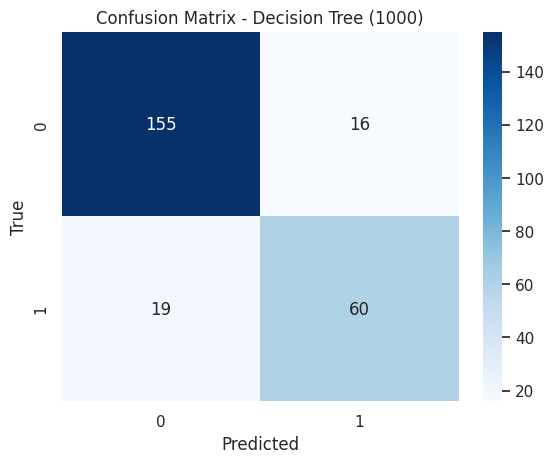

In [ ]:
# Confusion Matrix
cm_dt_1000 = confusion_matrix(y_test_1000, y_pred_dt_1000)
sns.heatmap(cm_dt_1000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (1000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 5: Train and Evaluate XGBoost on 1,000 Patient Subset**

In [ ]:
if df_1000 is not None:
  xgb_classifier_1000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_1000.fit(X_train_1000, y_train_1000)
  y_pred_xgb_1000 = xgb_classifier_1000.predict(X_test_1000)

  # Train sonuçlarını hesapla
  y_train_pred_xgb = xgb_classifier_1000.predict(X_train_1000)
  train_accuracy_xgb = accuracy_score(y_train_1000, y_train_pred_xgb)
  train_precision_xgb = precision_score(y_train_1000, y_train_pred_xgb)
  train_recall_xgb = recall_score(y_train_1000, y_train_pred_xgb)
  train_f1_xgb = f1_score(y_train_1000, y_train_pred_xgb)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_xgb_1000 = accuracy_score(y_test_1000, y_pred_xgb_1000)
  precision_xgb_1000 = precision_score(y_test_1000, y_pred_xgb_1000)
  recall_xgb_1000 = recall_score(y_test_1000, y_pred_xgb_1000)
  f1_xgb_1000 = f1_score(y_test_1000, y_pred_xgb_1000)

  print(f"\nXGBoost (1,000 Patients) - Accuracy: {accuracy_xgb_1000:.4f}")
  print(f"XGBoost (1,000 Patients) - Precision: {precision_xgb_1000:.4f}")
  print(f"XGBoost (1,000 Patients) - Recall: {recall_xgb_1000:.4f}")
  print(f"XGBoost (1,000 Patients) - F1-Score: {f1_xgb_1000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

XGBoost (1,000 Patients) - Accuracy: 0.8640
XGBoost (1,000 Patients) - Precision: 0.8000
XGBoost (1,000 Patients) - Recall: 0.7595
XGBoost (1,000 Patients) - F1-Score: 0.7792


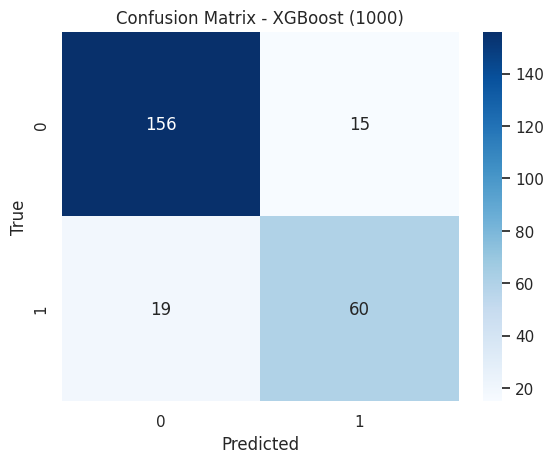

In [ ]:
# Confusion Matrix
cm_xgb_1000 = confusion_matrix(y_test_1000, y_pred_xgb_1000)
sns.heatmap(cm_xgb_1000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (1000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 6: Training Models on Subsets of Data**

6.1: Create Data Subsets 2,000 Patients
* **Action:** Original dataset was randomly sampled to create subsets of 2,000 patients.
* **Consideration:** The subsets were also stratified to maintain class distribution, especially since the dataset is imbalanced.

In [ ]:
if len(df) < 2000:
  print("Warning: Dataset has less than 2,000 patients. Cannot create 2,000 patient subset.")
  df_2000 = None
else:
    # Stratified sampling for df_2000
    df_2000 = df.groupby('Sarcopenia').sample(n=int(2000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)

    if len(df_2000) < 2000:
        remaining_samples = 2000 - len(df_2000)
        remaining_df = df[~df.index.isin(df_2000.index)]
        df_2000 = pd.concat([df_2000, remaining_df.sample(n=remaining_samples, random_state=42)])
    elif len(df_2000) > 2000:
        df_2000 = df_2000.sample(n=2000, random_state=42)


    X_2000 = df_2000.drop('Sarcopenia', axis=1)
    y_2000 = df_2000['Sarcopenia']
    # Now perform a stratified train-test split on the stratified subset
    X_train_2000, X_test_2000, y_train_2000, y_test_2000 = train_test_split(X_2000, y_2000, test_size=0.25, random_state=42, stratify=y_2000)

**Step 7: Train and Evaluate Decision Tree on 2,000 Patient Subset**

In [ ]:
if df_2000 is not None:
  dt_classifier_2000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_2000.fit(X_train_2000, y_train_2000)
  y_pred_dt_2000 = dt_classifier_2000.predict(X_test_2000)

  # Train sonuçlarını hesapla
  y_train_pred_dt = dt_classifier_2000.predict(X_train_2000)
  train_accuracy_dt = accuracy_score(y_train_2000, y_train_pred_dt)
  train_precision_dt = precision_score(y_train_2000, y_train_pred_dt)
  train_recall_dt = recall_score(y_train_2000, y_train_pred_dt)
  train_f1_dt = f1_score(y_train_2000, y_train_pred_dt)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_dt_2000 = accuracy_score(y_test_2000, y_pred_dt_2000)
  precision_dt_2000 = precision_score(y_test_2000, y_pred_dt_2000)
  recall_dt_2000 = recall_score(y_test_2000, y_pred_dt_2000)
  f1_dt_2000 = f1_score(y_test_2000, y_pred_dt_2000)

  print(f"\nDecision Tree (2,000 Patients) - Accuracy: {accuracy_dt_2000:.4f}")
  print(f"Decision Tree (2,000 Patients) - Precision: {precision_dt_2000:.4f}")
  print(f"Decision Tree (2,000 Patients) - Recall: {recall_dt_2000:.4f}")
  print(f"Decision Tree (2,000 Patients) - F1-Score: {f1_dt_2000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

Decision Tree (2,000 Patients) - Accuracy: 0.8700
Decision Tree (2,000 Patients) - Precision: 0.7647
Decision Tree (2,000 Patients) - Recall: 0.8014
Decision Tree (2,000 Patients) - F1-Score: 0.7826


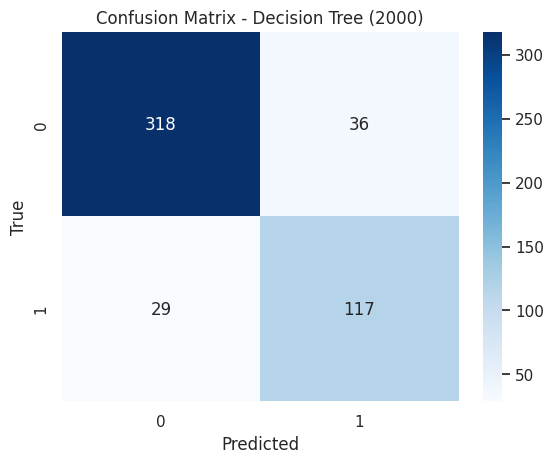

In [ ]:
# Confusion Matrix
cm_dt_2000 = confusion_matrix(y_test_2000, y_pred_dt_2000)
sns.heatmap(cm_dt_2000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (2000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 8: Train and Evaluate XGBoost on 2,000 Patient Subset**

In [ ]:
if df_2000 is not None:
  xgb_classifier_2000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_2000.fit(X_train_2000, y_train_2000)
  y_pred_xgb_2000 = xgb_classifier_2000.predict(X_test_2000)

  # Train sonuçlarını hesapla
  y_train_pred_xgb = xgb_classifier_2000.predict(X_train_2000)
  train_accuracy_xgb = accuracy_score(y_train_2000, y_train_pred_xgb)
  train_precision_xgb = precision_score(y_train_2000, y_train_pred_xgb)
  train_recall_xgb = recall_score(y_train_2000, y_train_pred_xgb)
  train_f1_xgb = f1_score(y_train_2000, y_train_pred_xgb)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_xgb_2000 = accuracy_score(y_test_2000, y_pred_xgb_2000)
  precision_xgb_2000 = precision_score(y_test_2000, y_pred_xgb_2000)
  recall_xgb_2000 = recall_score(y_test_2000, y_pred_xgb_2000)
  f1_xgb_2000 = f1_score(y_test_2000, y_pred_xgb_2000)

  print(f"\nXGBoost (2,000 Patients) - Accuracy: {accuracy_xgb_2000:.4f}")
  print(f"XGBoost (2,000 Patients) - Precision: {precision_xgb_2000:.4f}")
  print(f"XGBoost (2,000 Patients) - Recall: {recall_xgb_2000:.4f}")
  print(f"XGBoost (2,000 Patients) - F1-Score: {f1_xgb_2000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

XGBoost (2,000 Patients) - Accuracy: 0.8960
XGBoost (2,000 Patients) - Precision: 0.8310
XGBoost (2,000 Patients) - Recall: 0.8082
XGBoost (2,000 Patients) - F1-Score: 0.8194


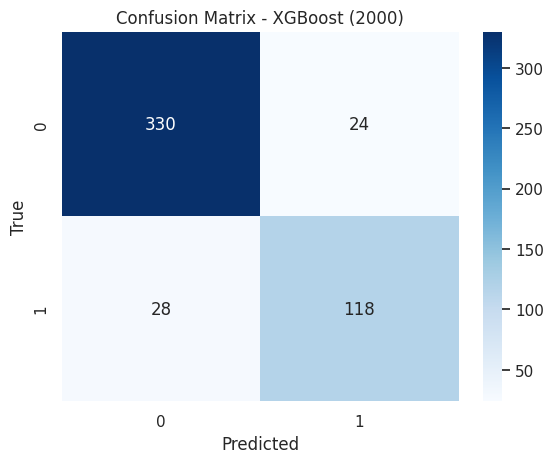

In [ ]:
# Confusion Matrix
cm_xgb_2000 = confusion_matrix(y_test_2000, y_pred_xgb_2000)
sns.heatmap(cm_xgb_2000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (2000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 9. Comparative Analysis and Reporting**
*   Consolidate and Present Results

In [ ]:
results = {
        'Model': ['Decision Tree (1K)', 'XGBoost (1K)',
                  'Decision Tree (2K)', 'XGBoost (2K)'],
        'Accuracy': [accuracy_dt_1000 if df_1000 is not None else np.nan, accuracy_xgb_1000 if df_1000 is not None else np.nan,
                     accuracy_dt_2000 if df_2000 is not None else np.nan, accuracy_xgb_2000 if df_2000 is not None else np.nan],
        'Precision': [precision_dt_1000 if df_1000 is not None else np.nan, precision_xgb_1000 if df_1000 is not None else np.nan,
                      precision_dt_2000 if df_2000 is not None else np.nan, precision_xgb_2000 if df_2000 is not None else np.nan],
        'Recall': [recall_dt_1000 if df_1000 is not None else np.nan, recall_xgb_1000 if df_1000 is not None else np.nan,
                   recall_dt_2000 if df_2000 is not None else np.nan, recall_xgb_2000 if df_2000 is not None else np.nan],
        'F1-Score': [f1_dt_1000 if df_1000 is not None else np.nan, f1_xgb_1000 if df_1000 is not None else np.nan,
                     f1_dt_2000 if df_2000 is not None else np.nan, f1_xgb_2000 if df_2000 is not None else np.nan]
    }
results_df = pd.DataFrame(results)
print("\n--- Model Performance Summary ---")
print(results_df.round(4))


--- Model Performance Summary ---
                Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree (1K)     0.860     0.7895  0.7595    0.7742
1        XGBoost (1K)     0.864     0.8000  0.7595    0.7792
2  Decision Tree (2K)     0.870     0.7647  0.8014    0.7826
3        XGBoost (2K)     0.896     0.8310  0.8082    0.8194


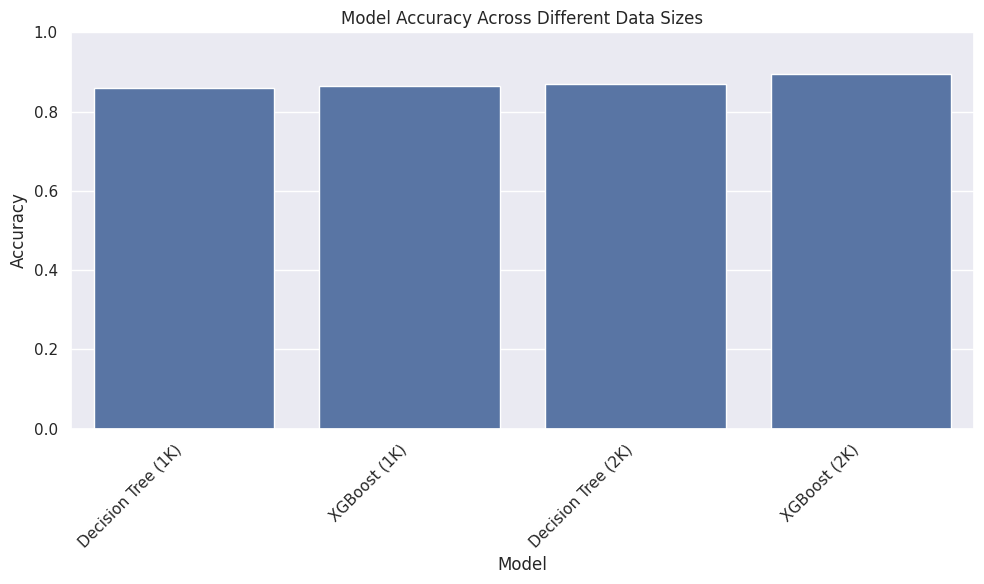

In [ ]:
# Visualization (Accuracy Comparison)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Across Different Data Sizes')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Step 10: Interpreting the Results and Conclusion**

Model XGBoost performed best overall since F1-Scores for all results are higher than that of Model Decision Tree. The F1-score is often a good overall metric when you need a balance between minimizing both false positives and false negatives, and when your dataset is imbalanced. In our case, we have 20% of observations has sarcopenia disease.  

With smaller data sets (1,000 vs. 2,000), XGBoost performed better. It has better results for all four parameters wise. For 2K data size, it only has Recall parameter slightly less than Decision Tree model.

All in all, there is no significant differences between them. The results are very close.
